In [97]:
library('entropy')
library('igraph')

In [65]:
install.packages('entropy')


The downloaded binary packages are in
	/var/folders/7q/9tm7mqz16p764351t4l5mybr0000gn/T//Rtmp5QbhmX/downloaded_packages


In [2]:
library(igraph)




Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [211]:
egoNodes = dir("gplus",pattern = "edges")
# egoNodes_id = numeric()
# for (i in 1:length(egoNodes))
# {
#   egoNodes_id = c(egoNodes_id,strsplit(egoNodes[i],".edges"))
# }
# print(egoNodes)
# print(egoNodes_id)

## Question 18: How many personal networks are there? ##

In [4]:
print(length(egoNodes))

[1] 132


## Question 19: For the 3 personal networks (node ID given below), plot the in-degree and out-degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribu- tion. In this question, you should have 6 plots. ##

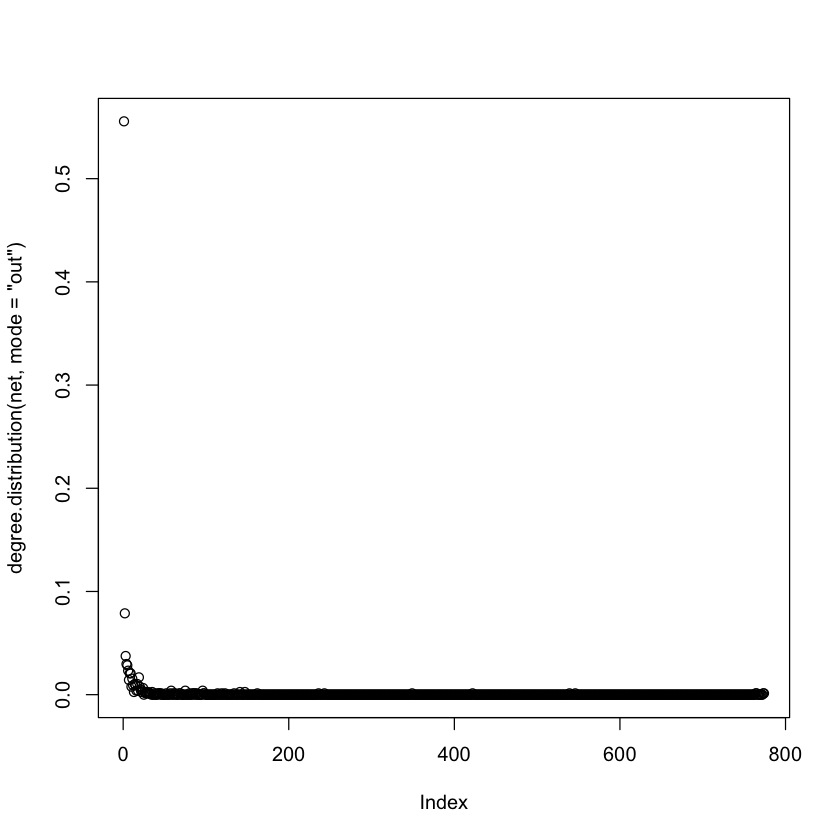

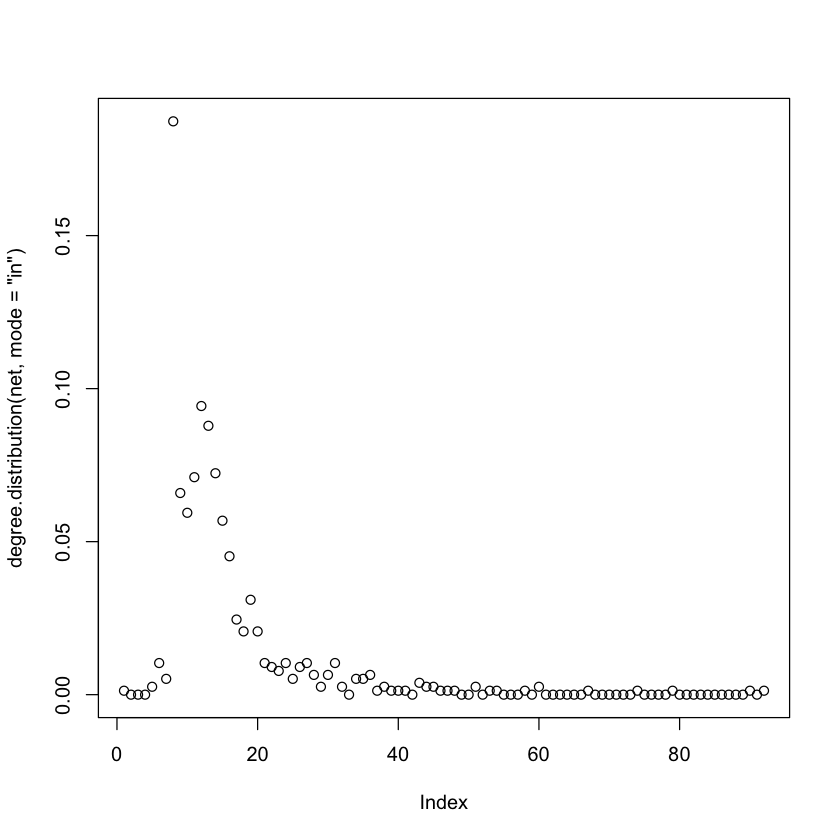

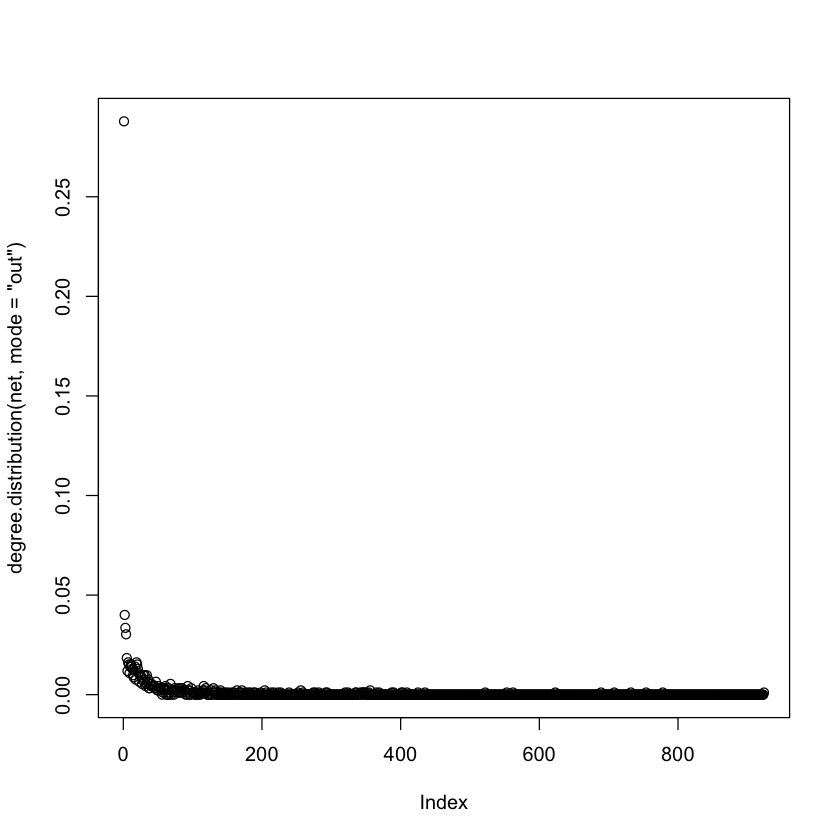

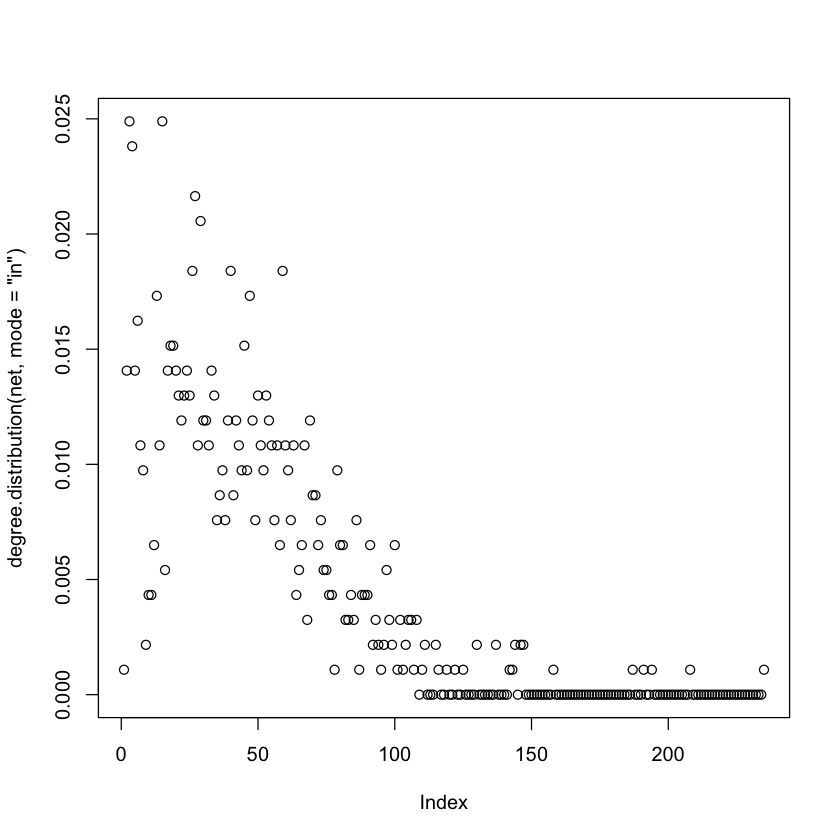

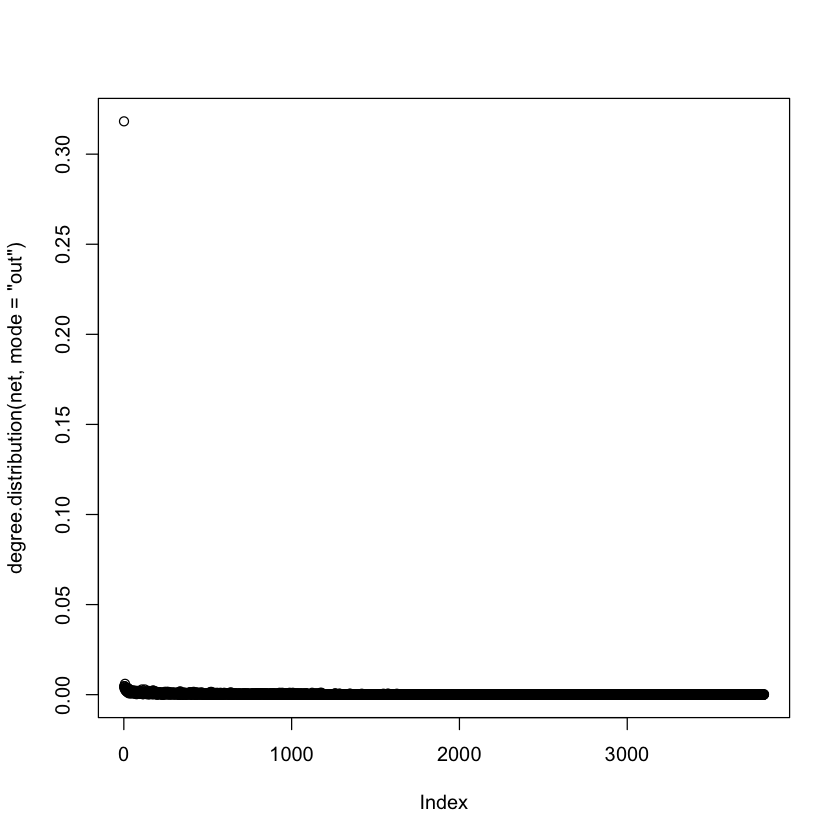

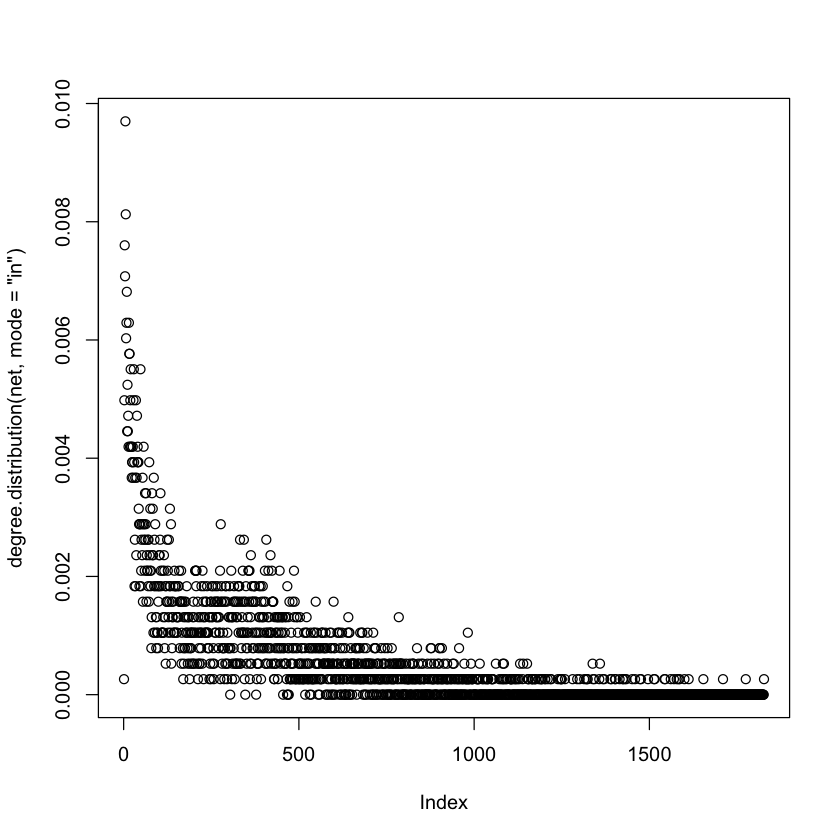

In [5]:
nodeId = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
create_personal_network = function(nodeId){
#     print(nodeId[i])
    edges_file = paste("gplus/", nodeId, ".edges", sep="")
    net = read.graph(edges_file, format = "ncol", directed=TRUE)
    net = add.vertices(net, nv = 1, name = nodeId)
    edge_list = c()
    for (node in 1:(vcount(net)-1))
    {
        edge_list = c(edge_list, c(vcount(net), node))
    }
    net = add_edges(net, edge_list)
    plot(degree.distribution(net,mode="out"))
    plot(degree.distribution(net,mode="in"))
    return(net)
}
net1 = create_personal_network(nodeId[1])
net2 = create_personal_network(nodeId[2])
net3 = create_personal_network(nodeId[3])

### Question 20: For the 3 personal networks picked in question 19, ex- tract the community structure of each personal network using Walk- trap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots. ###

In [6]:
walk_trap_community = walktrap.community(net1)
modularity(walk_trap_community)




[1] 0.2527654

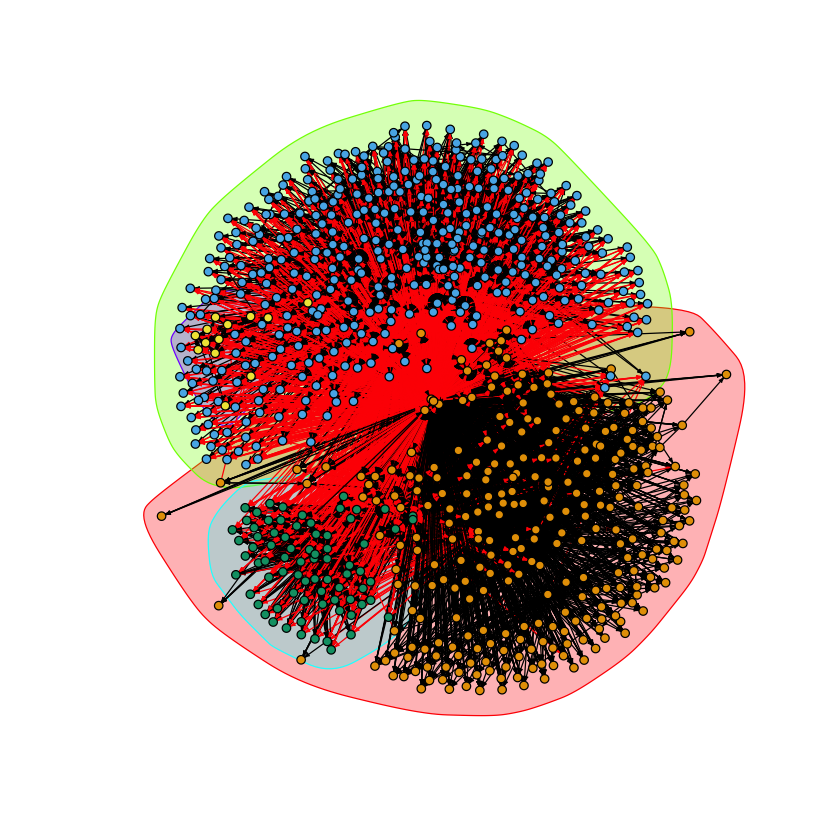

In [7]:
plot(walk_trap_community, net1, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)

In [8]:
sizes = sizes(walk_trap_community)
for (i in 1:length(walk_trap_community)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


[1] "The  1 th community has size of  288"
[1] "The  2 th community has size of  397"
[1] "The  3 th community has size of  76"
[1] "The  4 th community has size of  13"


In [9]:
walk_trap_community2 = walktrap.community(net2)
modularity(walk_trap_community2)


[1] 0.3194726

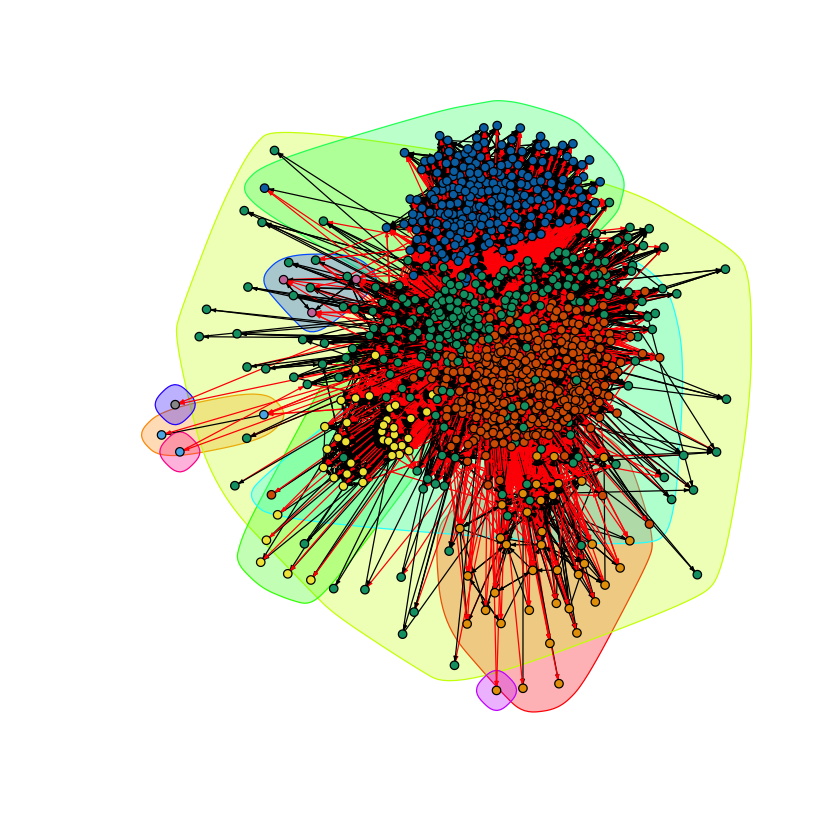

In [10]:
plot(walk_trap_community2, net2, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)

In [11]:
sizes = sizes(walk_trap_community2)
for (i in 1:length(walk_trap_community2)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


[1] "The  1 th community has size of  37"
[1] "The  2 th community has size of  2"
[1] "The  3 th community has size of  256"
[1] "The  4 th community has size of  40"
[1] "The  5 th community has size of  233"
[1] "The  6 th community has size of  350"
[1] "The  7 th community has size of  3"
[1] "The  8 th community has size of  1"
[1] "The  9 th community has size of  1"
[1] "The  10 th community has size of  1"


In [12]:
walk_trap_community3 = walktrap.community(net3)
modularity(walk_trap_community3)


[1] 0.1910903

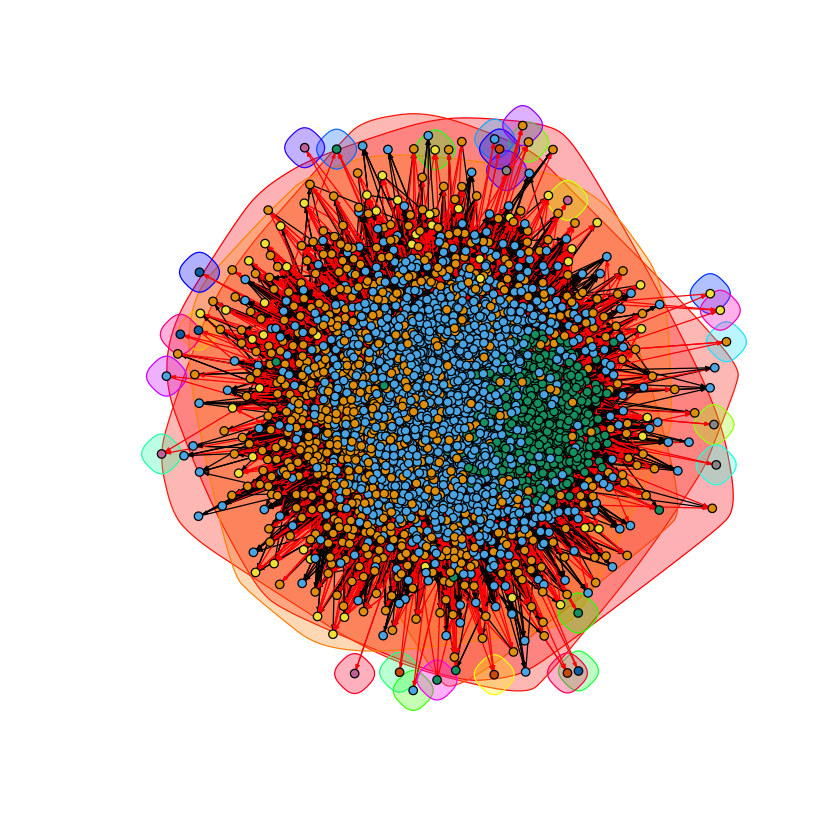

In [13]:
plot(walk_trap_community3, net3, vertex.label=NA, vertex.size=3, edge.arrow.size=.2)

In [14]:
sizes = sizes(walk_trap_community3)
for (i in 1:length(walk_trap_community3)){
    print(paste("The ",i,"th community has size of ",  sizes[i]))
}


[1] "The  1 th community has size of  980"
[1] "The  2 th community has size of  2026"
[1] "The  3 th community has size of  733"
[1] "The  4 th community has size of  49"
[1] "The  5 th community has size of  1"
[1] "The  6 th community has size of  1"
[1] "The  7 th community has size of  1"
[1] "The  8 th community has size of  1"
[1] "The  9 th community has size of  1"
[1] "The  10 th community has size of  1"
[1] "The  11 th community has size of  1"
[1] "The  12 th community has size of  1"
[1] "The  13 th community has size of  1"
[1] "The  14 th community has size of  1"
[1] "The  15 th community has size of  1"
[1] "The  16 th community has size of  1"
[1] "The  17 th community has size of  1"
[1] "The  18 th community has size of  1"
[1] "The  19 th community has size of  1"
[1] "The  20 th community has size of  1"
[1] "The  21 th community has size of  1"
[1] "The  22 th community has size of  1"
[1] "The  23 th community has size of  1"
[1] "The  24 th community has size 

### Question 21: Based on the expression for h and c, explain the meaning of homogeneity and completeness in words.


A clustering result satisfies homogeneity if all of its communities contain only data points which are members of a single circle. 

A clustering result satisfies completeness if all the data points that are members of a given circle are elements of the same communities.



### Question 22: Compute the h and c values for the community structures of the 3 personal network 

### Method 1: when calculating the H(C|K) and H(K|C), simply iterate the circles and communities and manually calculate the log base of Cji/ai and Cji/bj and multiplies it with Cji/N

In [239]:
egoNodes = dir("gplus",pattern = "circles")
# general_filenames = list()

# N = 0.0
all_communities = list(walk_trap_community, walk_trap_community2, walk_trap_community3)

manual_entropy = function(x, N){
    res = 0.0
    for(i in 1:length(x))
    {
        if(x[[i]]!=0)
        {
            res = res - ((x[[i]]/N)* log2((x[[i]]/N)))
        }
    }
    return(res)
}
for(k in 1:length(nodeId))
{
    print(paste("For node ", nodeId[k], "we calculate the result as below: "))
    all_circles = list()
    circle_user_amount = c()
    general_filenames = strsplit(nodeId[k],".circles")
    circles_file = paste("gplus/", general_filenames, ".circles", sep="")
    file_connection = file(circles_file , open="r")
    circle = readLines(file_connection)
    close(file_connection) 
   
    if(length(circle)>0){
        for (c in 1:length(circle)) 
        {
            content = strsplit(circle[[c]],"\t")     
            list_content = list(content[[1]][-1])
            all_circles = c(all_circles, list_content)
            circle_user_amount = c(circle_user_amount, length(list_content[[1]]))
        }
    }
    all_in_one_circle = c()
    for (circle in all_circles)
    {
        all_in_one_circle = c(all_in_one_circle, circle)
    }
    all_in_one_circle = unique(all_in_one_circle)
#     print(length(all_in_one_circle))
    
    N = length(all_in_one_circle)
    print(paste("N: ",N))
    ai = circle_user_amount
#     H_C = entropy(circle_user_amount/N)
    H_C = manual_entropy(ai, N)
    print(paste("H_C: ",H_C))    
    
    
#     print(sum(ai))
#     print("ai: ")
#     print(ai)
    
    # bi is the number of people in community Ki with circle information
    cur_community = all_communities[[k]]
    bi = numeric()
    for (i in 1:length(cur_community)){
        v = intersect(cur_community[[i]], all_in_one_circle)
        bi = c(bi, length(v))
    }
#     print("bi: ")
#     print(bi)
    
#     H_K = entropy(bi/N)
    H_K = manual_entropy(bi, N)
    print(paste("H_K: ", H_K))

    H_CK = 0.0
    mat = matrix(list(), nrow=length(cur_community), ncol=length(all_circles))
    for (j in 1:length(cur_community)){
        for (i in 1:length(all_circles))
        {
            C_ji = length(intersect(all_circles[[i]], cur_community[[j]]))
            mat[[j,i]] = C_ji
            if(C_ji != 0)
                H_CK = H_CK - ((C_ji/N) * log2(C_ji/bi[[j]]))
            else 
                H_CK = H_CK
        }

    }
    print(paste("H_CK: ", H_CK))

    H_KC = 0.0
    
    for (i in 1:length(all_circles))
    {
        for (j in 1:length(cur_community))
        {
            C_ji = mat[[j,i]]
            if(C_ji != 0)
                H_KC = H_KC - ((C_ji/N) * log2(C_ji/ai[[i]]))
            else 
                H_KC = H_KC
        }
    }
    print(paste("H_KC: ",H_KC))
    
    h = 1 - (H_CK/H_C)
    c = 1 - (H_KC/H_K)
    print(paste("h: ",h))
    print(paste("c: ",c))
    
#     print(mat)
    
}


[1] "For node  109327480479767108490 we calculate the result as below: "
[1] "N:  764"
[1] "H_C:  1.51595415381635"
[1] "H_K:  1.45020885763114"
[1] "H_CK:  0.224535374489447"
[1] "H_KC:  0.971822786318783"
[1] "h:  0.851885115440867"
[1] "c:  0.329873913536689"
[1] "For node  115625564993990145546 we calculate the result as below: "
[1] "N:  727"
[1] "H_C:  12.2126251379311"
[1] "H_K:  1.55982884141566"
[1] "H_CK:  6.69385826353235"
[1] "H_KC:  6.90062406548138"
[1] "h:  0.451890303032235"
[1] "c:  -3.4239623491117"
[1] "For node  101373961279443806744 we calculate the result as below: "
[1] "N:  521"
[1] "H_C:  0.554456498907601"
[1] "H_K:  0.711725628565447"
[1] "H_CK:  0.552312578092445"
[1] "H_KC:  1.78233064073994"
[1] "h:  0.00386670698130509"
[1] "c:  -1.5042383879479"


### Method2: when calculating the H(C|K) and H(K|C), transfer it to:
\begin{equation*}
\left( \sum_{j=1}^K \frac{bj}{N} * \sum_{i=1}^C \frac{Cji}{bj}* \log(\frac{Cji}{bj}) \right)
\end{equation*}

### So we can use entropy function to calculate the 
\begin{equation*}
\sum_{i=1}^C \frac{Cji}{bj}* \log(\frac{Cji}{bj})
\end{equation*}

### similarly for H(K|C) we will use the entropy function to calculate 
\begin{equation*}
\sum_{j=1}^K \frac{Cji}{ai}* \log(\frac{Cji}{ai})
\end{equation*}

### So that we can get:
\begin{equation*}
\left( \sum_{i=1}^C \frac{ai}{N} * \sum_{j=1}^K \frac{Cji}{ai}* \log(\frac{Cji}{ai}) \right)
\end{equation*}


In [241]:
for(k in 1:length(nodeId))
{
    print(paste("For node ", nodeId[k], "we calculate the result as below: "))
    all_circles = list()
    circle_user_amount = c()
    general_filenames = strsplit(nodeId[k],".circles")
    circles_file = paste("gplus/", general_filenames, ".circles", sep="")
    file_connection = file(circles_file , open="r")
    circle = readLines(file_connection)
    close(file_connection) 
   
    if(length(circle)>0){
        for (c in 1:length(circle)) 
        {
            content = strsplit(circle[[c]],"\t")     
            list_content = list(content[[1]][-1])
            all_circles = c(all_circles, list_content)
            circle_user_amount = c(circle_user_amount, length(list_content[[1]]))
        }
    }
    all_in_one_circle = c()
    for (circle in all_circles)
    {
        all_in_one_circle = c(all_in_one_circle, circle)
    }
    print(paste("all circles nodes", length(all_in_one_circle)))
    all_in_one_circle = unique(all_in_one_circle)
#     print(length(all_in_one_circle))

    N = length(all_in_one_circle)
    print(paste("N: ",N))
    ai = circle_user_amount
#     ai_N = c()
#     for(i in 1:length(ai))
#     {
#         if(ai[[i]]!=0)
#         {
#             ai_N = c(ai_N, ai[[i]]/N)
#         }
#     }
    H_C = entropy(ai/N)
#     H_C = entropy(ai_N)
    print(paste("H_C: ",H_C))    

    print("ai: ")
    print(ai)
    
    # bi is the number of people in community Ki with circle information
    cur_community = all_communities[[k]]
    bi = numeric()
    for (i in 1:length(cur_community)){
        v = intersect(cur_community[[i]], all_in_one_circle)
        bi = c(bi, length(v))
    }
    print("bi: ")
    print(bi)
    
    H_K = entropy(bi/N)
    print(paste("H_K: ", H_K))

    
    H_CK_sum = 0.0
    mat = matrix(list(), nrow=length(cur_community), ncol=length(all_circles))
    for (j in 1:length(cur_community)){
        H_CK = c()
        for (i in 1:length(all_circles))
        {
            C_ji = length(intersect(all_circles[[i]], cur_community[[j]]))
            mat[[j,i]] = C_ji
            if(C_ji != 0)
                H_CK = c(H_CK, C_ji/bi[[j]])
#             else 
#               H_CK = c(H_CK, 0.000001)
        }
        H_CK_sum = H_CK_sum + (bi[[j]]/N) * entropy(H_CK)

    }
#     print(H_CK)
    
    print(paste("H_CK: ",H_CK_sum))
#     print(paste("H_CK: ", H_CK))

    
    H_KC_sum = 0.0
    for (i in 1:length(all_circles))
    {
        H_KC = c()
        for (j in 1:length(cur_community))
        {
            C_ji = mat[[j,i]]
            if(C_ji != 0)
                H_KC = c(H_KC, C_ji/ai[[i]])
#             else 
#                 H_KC = c(H_KC, 0.000001)
        }
        H_KC_sum = H_KC_sum + (ai[[i]]/N) * entropy(H_KC)
    }
    print(paste("H_KC: ",H_KC_sum))
    
    h = 1 - (H_CK_sum/H_C)
    c = 1 - (H_KC_sum/H_K)
    print(paste("h: ",h))
    print(paste("c: ",c))
    
}


[1] "For node  109327480479767108490 we calculate the result as below: "
[1] "all circles nodes 1095"
[1] "N:  764"
[1] "H_C:  1.0930883567809"
[1] "ai: "
[1] 330 346 419
[1] "bi: "
[1] 279 397  75  13
[1] "H_K:  1.00520818089008"
[1] "H_CK:  0.414829997041996"
[1] "H_KC:  0.673616224340775"
[1] "h:  0.620497286913152"
[1] "c:  0.329873913536689"
[1] "For node  115625564993990145546 we calculate the result as below: "
[1] "all circles nodes 6467"
[1] "N:  727"
[1] "H_C:  3.13716655108452"
[1] "ai: "
 [1]   6   9 169 276 325  93  73 338  46  62 338 255 485   7 260 363 188 327 314
[20]  48 489 276  79 373  67  10 354  73 300 362 102
[1] "bi: "
 [1]   1   0 146   3 231 345   1   0   0   0
[1] "H_K:  1.08119096358335"
[1] "H_CK:  2.60014097490328"
[1] "H_KC:  4.78314811509253"
[1] "h:  0.171181723200379"
[1] "c:  -3.4239623491117"
[1] "For node  101373961279443806744 we calculate the result as below: "
[1] "all circles nodes 1346"
[1] "N:  521"
[1] "H_C:  1.09790227426011"
[1] "ai: "
[1] 4